## Basic Masking
***

In [1]:
# Notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Masking - Basic masking can be used to overlay images while removing backgrounds, but can also be used as a filtering
# technique to help remove noise.

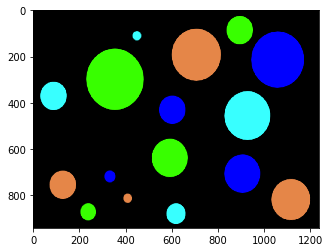

In [38]:
circles = cv2.imread('../Image_Data/Circles.png')

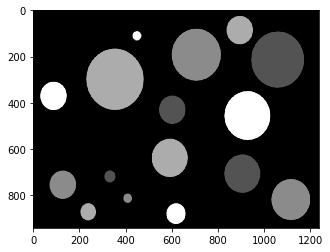

In [29]:
gray_circles = cv2.cvtColor(circles, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_circles, cmap='gray')

In [39]:
# Getting the rgb values
print(circles[300, 300]) # green
print(circles[350, 100]) # yellow
print(circles[750, 100]) # blue
print(circles[200, 1100]) # red
print()
# Getting gray values
print(gray_circles[300, 300]) #green
print(gray_circles[350, 100]) # yellow
print(gray_circles[750, 100]) # blue
print(gray_circles[200, 1100]) # red

[ 56 255   0]
[ 56 255 255]
[229 134  72]
[  0   0 255]

156
232
126
76


(942, 1238)


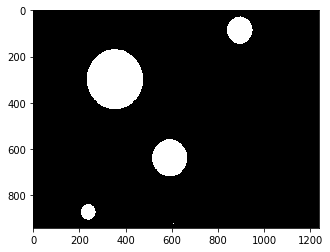

In [31]:
mask = cv2.inRange(gray_circles, 156, 156)
mask_inv = cv2.bitwise_not(mask)
print(mask.shape)
plt.imshow(mask, cmap='gray')

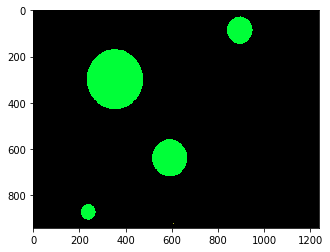

In [35]:
result = cv2.bitwise_and(circles, circles, mask=mask)
plt.imshow(result)

In [54]:
def find_circles(img, color_range):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(img, color_range[0], color_range[1])
    return cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask), cv2.COLOR_BGR2RGB)

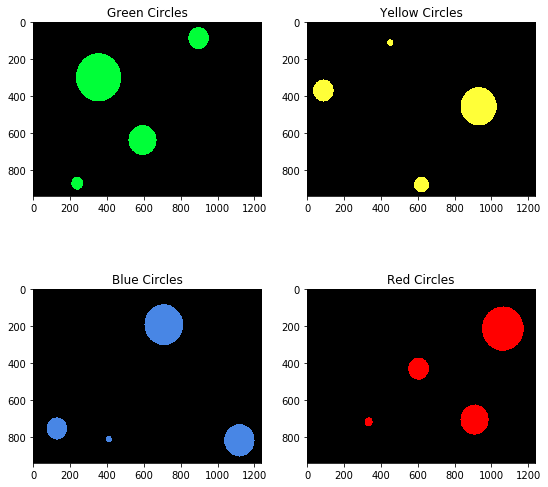

In [60]:
# Lower and upper range bounds for each color
green_range = np.array([[50, 240, 0], [60, 255, 20]], dtype='uint8')
yellow_range = np.array([[40, 240, 240], [60, 255, 255]], dtype='uint8')
blue_range = np.array([[220, 120, 60], [235, 140, 80]], dtype='uint8')
red_range = np.array([[0, 0, 230], [15, 15, 255]], dtype='uint8')

# Getting image results
green_circles = find_circles(circles, green_range)
yellow_circles = find_circles(circles, yellow_range)
blue_circles = find_circles(circles, blue_range)
red_circles = find_circles(circles, red_range)

# Graphing results
fig, axarr = plt.subplots(2, 2, figsize=(9, 9))
axarr[0][0].set_title('Green Circles')
axarr[0][0].imshow(green_circles)
axarr[0][1].set_title('Yellow Circles')
axarr[0][1].imshow(yellow_circles)
axarr[1][0].set_title('Blue Circles')
axarr[1][0].imshow(blue_circles)
axarr[1][1].set_title('Red Circles')
axarr[1][1].imshow(red_circles)

In [61]:
# End